In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
df = pd.read_csv("housePrice.csv")

In [9]:
df.head()

,size,bedroom,price
0,850,2,127000
1,900,2,139000
2,1000,3,169000
3,1200,3,185000
4,1500,3,210000


# Data clean


In [14]:
df.shape

(12, 3)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   size     12 non-null     int64
 1   bedroom  12 non-null     int64
 2   price    12 non-null     int64
dtypes: int64(3)
memory usage: 420.0 bytes


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.isna().sum()

size       0
bedroom    0
price      0
dtype: int64

In [20]:
df.describe()

,size,bedroom,price
count,12.000000,12.000000,12.000000
mean,1779.166667,3.666667,250000.000000
std,730.335643,1.073087,85962.994152
min,850.000000,2.000000,127000.000000
25%,1150.000000,3.000000,181000.000000
50%,1750.000000,4.000000,255000.000000
75%,2200.000000,4.250000,303750.000000
max,3000.000000,5.000000,390000.000000


# vizulaization


In [23]:
df.head()

,size,bedroom,price
0,850,2,127000
1,900,2,139000
2,1000,3,169000
3,1200,3,185000
4,1500,3,210000


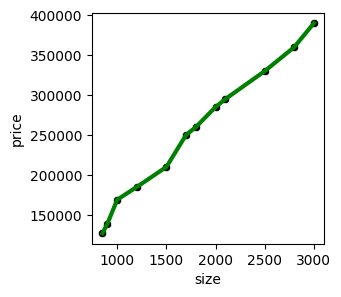

In [31]:
plt.figure(figsize=(3,3))
sns.scatterplot(data=df, x='size', y='price', color='black')
plt.plot(df['size'],df['price'], color='green', lw=3)
plt.show()

Text(0, 0.5, 'price')

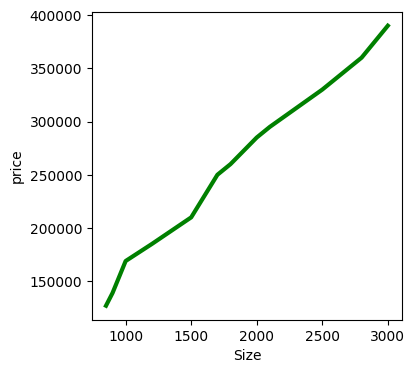

In [34]:
plt.figure(figsize=(4,4))
plt.plot(df['size'],df['price'], color='green', lw=3)
plt.xlabel('Size')
plt.ylabel('price')

In [11]:
#feature/Target split
x = df[['size', 'bedroom']]
y = df[['price']]

In [12]:
x.head()

,size,bedroom
0,850,2
1,900,2
2,1000,3
3,1200,3
4,1500,3


In [13]:
y.head()

,price
0,127000
1,139000
2,169000
3,185000
4,210000
